In [1]:
import numpy as np
import pandas as pd
# librerias para graficar
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# el modelo
from sklearn.linear_model import LogisticRegression
# metricas para evaluar al modelo
from sklearn import metrics
# importamos el modulo para cross validation
from sklearn.model_selection import cross_val_score
# el separador de datos en entrenamiento y testeo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from datetime import datetime, timedelta
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

from wordcloud import WordCloud
import itertools
import matplotlib.ticker as ticker

import seaborn as sns

import nltk, re, collections, pickle, os # nltk - Kit de herramientas de lenguaje natural
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import dump 
from joblib import load
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2024-02-04 21:26:17.307407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Cargamos la base de datos 
Final= pd.read_csv('/Users/elva/Downloads/ComercioExteriorF.csv', delimiter=';')

In [3]:
Final.head()

,GESTION,MES,Departamento,NANDINA,des_nandina,des_Pais,des_Medio_Sal,des_Via_Sal,CUCIR3,GCE,CIIU3,CODACT,TNT,Peso_Bruto_Kg,Peso_Neto_Kg,Valor_FOB_Sus
0,2018,1,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,84412,78471,446435
1,2018,2,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,48058,44831,263136
2,2018,3,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,87845,81769,478434
3,2018,5,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,62414,58332,332144
4,2018,6,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,85491,79750,465085


In [4]:
Final['Cod_des_nandina'], _ = pd.factorize(Final['des_nandina'])
Final['Cod_des_Pais'], _ = pd.factorize(Final['des_Pais'])
Final['Cod_des_Medio_Sal'], _ = pd.factorize(Final['des_Medio_Sal'])
Final['Cod_des_Via_Sal'], _ = pd.factorize(Final['des_Via_Sal'])

In [5]:
Final.head()

,GESTION,MES,Departamento,NANDINA,des_nandina,des_Pais,des_Medio_Sal,des_Via_Sal,CUCIR3,GCE,CIIU3,CODACT,TNT,Peso_Bruto_Kg,Peso_Neto_Kg,Valor_FOB_Sus,Cod_des_nandina,Cod_des_Pais,Cod_des_Medio_Sal,Cod_des_Via_Sal
0,2018,1,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,84412,78471,446435,0,0,0,0
1,2018,2,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,48058,44831,263136,0,0,0,0
2,2018,3,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,87845,81769,478434,0,0,0,0
3,2018,5,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,62414,58332,332144,0,0,0,0
4,2018,6,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,85491,79750,465085,0,0,0,0


In [6]:
Final.dropna()

,GESTION,MES,Departamento,NANDINA,des_nandina,des_Pais,des_Medio_Sal,des_Via_Sal,CUCIR3,GCE,CIIU3,CODACT,TNT,Peso_Bruto_Kg,Peso_Neto_Kg,Valor_FOB_Sus,Cod_des_nandina,Cod_des_Pais,Cod_des_Medio_Sal,Cod_des_Via_Sal
0,2018,1,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,84412,78471,446435,0,0,0,0
1,2018,2,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,48058,44831,263136,0,0,0,0
2,2018,3,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,87845,81769,478434,0,0,0,0
3,2018,5,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,62414,58332,332144,0,0,0,0
4,2018,6,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,85491,79750,465085,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,2021,4,5.0,2608000000,MINERAL DE CINC Y SUS CONCENTRADOS,CANADA,CARRETERA,ANTOFAGASTA - OLLAGUE - UYUNI,2875,210,1320,C4,3,386757,330165,445388,447,25,0,14
14014,2021,4,5.0,2608000000,MINERAL DE CINC Y SUS CONCENTRADOS,COREA (SUR). REPUBLICA DE,FERROVIARIA,ANTOFAGASTA - OLLAGUE - UYUNI,2875,210,1320,C4,3,1561282,1140448,2002349,447,26,3,14
14015,2021,4,2.0,2608000000,MINERAL DE CINC Y SUS CONCENTRADOS,COREA (SUR). REPUBLICA DE,CARRETERA,ANTOFAGASTA - OLLAGUE - UYUNI,2875,210,1320,C4,3,32732,14236,39858,447,26,0,14
14016,2021,4,4.0,2608000000,MINERAL DE CINC Y SUS CONCENTRADOS,COREA (SUR). REPUBLICA DE,CARRETERA,ANTOFAGASTA - OLLAGUE - UYUNI,2875,210,1320,C4,3,201443,89169,249660,447,26,0,14


In [7]:
#Verificamos la informacion
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GESTION            14018 non-null  int64  
 1   MES                14018 non-null  int64  
 2   Departamento       14018 non-null  float64
 3   NANDINA            14018 non-null  int64  
 4   des_nandina        14018 non-null  object 
 5   des_Pais           14018 non-null  object 
 6   des_Medio_Sal      14018 non-null  object 
 7   des_Via_Sal        14018 non-null  object 
 8   CUCIR3             14018 non-null  int64  
 9   GCE                14018 non-null  int64  
 10  CIIU3              14018 non-null  int64  
 11  CODACT             14018 non-null  object 
 12  TNT                14018 non-null  int64  
 13  Peso_Bruto_Kg      14018 non-null  int64  
 14  Peso_Neto_Kg       14018 non-null  int64  
 15  Valor_FOB_Sus      14018 non-null  int64  
 16  Cod_des_nandina    140

In [8]:
#Visualizamos el tamaño de la base de datos
Final.shape

(14018, 20)

In [9]:
#Buscamos valores nulos en la base de datos
Final.isnull().sum()

GESTION              0
MES                  0
Departamento         0
NANDINA              0
des_nandina          0
des_Pais             0
des_Medio_Sal        0
des_Via_Sal          0
CUCIR3               0
GCE                  0
CIIU3                0
CODACT               0
TNT                  0
Peso_Bruto_Kg        0
Peso_Neto_Kg         0
Valor_FOB_Sus        0
Cod_des_nandina      0
Cod_des_Pais         0
Cod_des_Medio_Sal    0
Cod_des_Via_Sal      0
dtype: int64

In [10]:
#Visualizamos los tipos de datos
Final.dtypes

GESTION                int64
MES                    int64
Departamento         float64
NANDINA                int64
des_nandina           object
des_Pais              object
des_Medio_Sal         object
des_Via_Sal           object
CUCIR3                 int64
GCE                    int64
CIIU3                  int64
CODACT                object
TNT                    int64
Peso_Bruto_Kg          int64
Peso_Neto_Kg           int64
Valor_FOB_Sus          int64
Cod_des_nandina        int64
Cod_des_Pais           int64
Cod_des_Medio_Sal      int64
Cod_des_Via_Sal        int64
dtype: object

In [11]:
#Cantidad de datos por Año
Final['GESTION'].value_counts()

GESTION
2021    4413
2018    3898
2019    3708
2020    1999
Name: count, dtype: int64

In [12]:
#Bivariado con las variables que ingresen en el estudio, respecto de la
#variable objetivo.
Final.head(1).T

,0
GESTION,2018
MES,1
Departamento,7.0
NANDINA,201300000
des_nandina,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...
des_Pais,PERU
des_Medio_Sal,CARRETERA
des_Via_Sal,DESAGUADERO
CUCIR3,111
GCE,122


In [13]:
plt.style.use('ggplot')

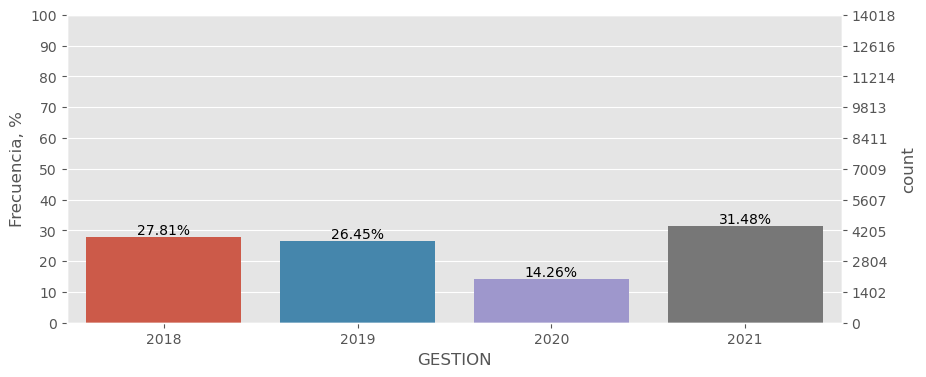

In [14]:
plt.figure(figsize = (10, 4))
counter = Final.shape[0]
ax1 = sns.countplot(x=Final['GESTION'])
ax2 = ax1.twinx()                      
ax2.yaxis.tick_left()                
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')  
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frecuencia, %')
for p in ax1.patches:
  x = p.get_bbox().get_points()[:, 0]
  y = p.get_bbox().get_points()[1, 1]
  ax1.annotate('{:.2f}%'.format(100. * y / counter),
              (x.mean(), y),
              ha = 'center',
              va = 'bottom')

ax1.yaxis.set_major_locator(ticker.LinearLocator(11))

ax2.set_ylim(0, 100)
ax1.set_ylim(0, counter)

ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax2.grid(None)

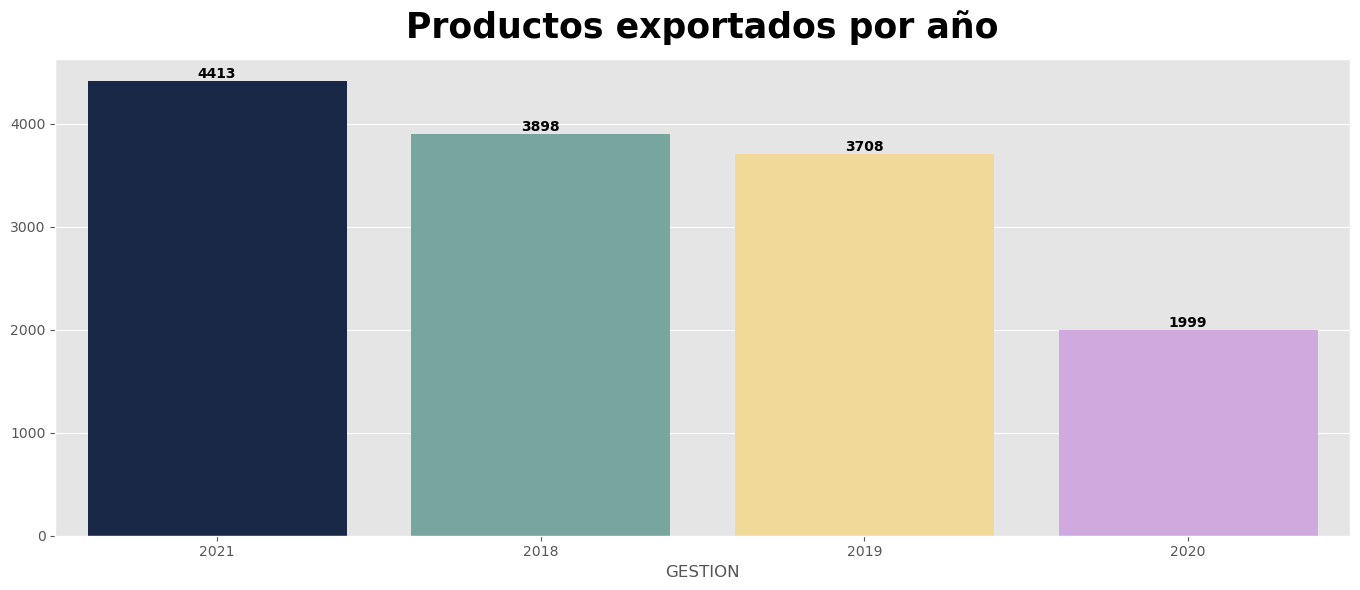

In [15]:
plt.figure(figsize=(13.7,6))
z = Final["GESTION"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Productos exportados por año",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()

In [16]:
Final[['GESTION']].describe()

,GESTION
count,14018.000000
mean,2019.494150
std,1.198261
min,2018.000000
25%,2018.000000
50%,2019.000000
75%,2021.000000
max,2021.000000


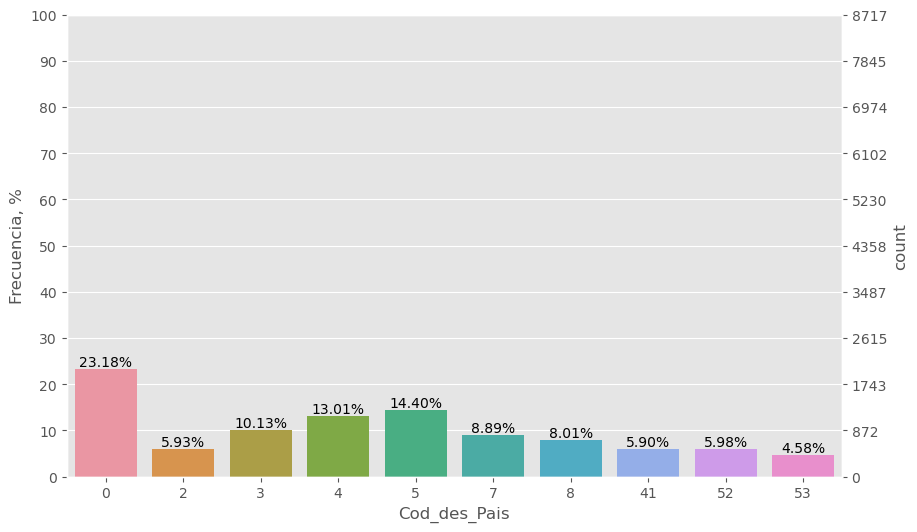

In [17]:
plt.figure(figsize=(10, 6))

sorted_countries = Final['Cod_des_Pais'].value_counts().index[:10]
filtered_final = Final[Final['Cod_des_Pais'].isin(sorted_countries)]
counter = filtered_final.shape[0]

ax1 = sns.countplot(x=filtered_final['Cod_des_Pais'])
ax2 = ax1.twinx()                      
ax2.yaxis.tick_left()                
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')  
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frecuencia, %')

for p in ax1.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax1.annotate('{:.2f}%'.format(100. * y / counter),
                (x.mean(), y),
                ha='center',
                va='bottom')

ax1.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0, 100)
ax1.set_ylim(0, counter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(None)

plt.show()

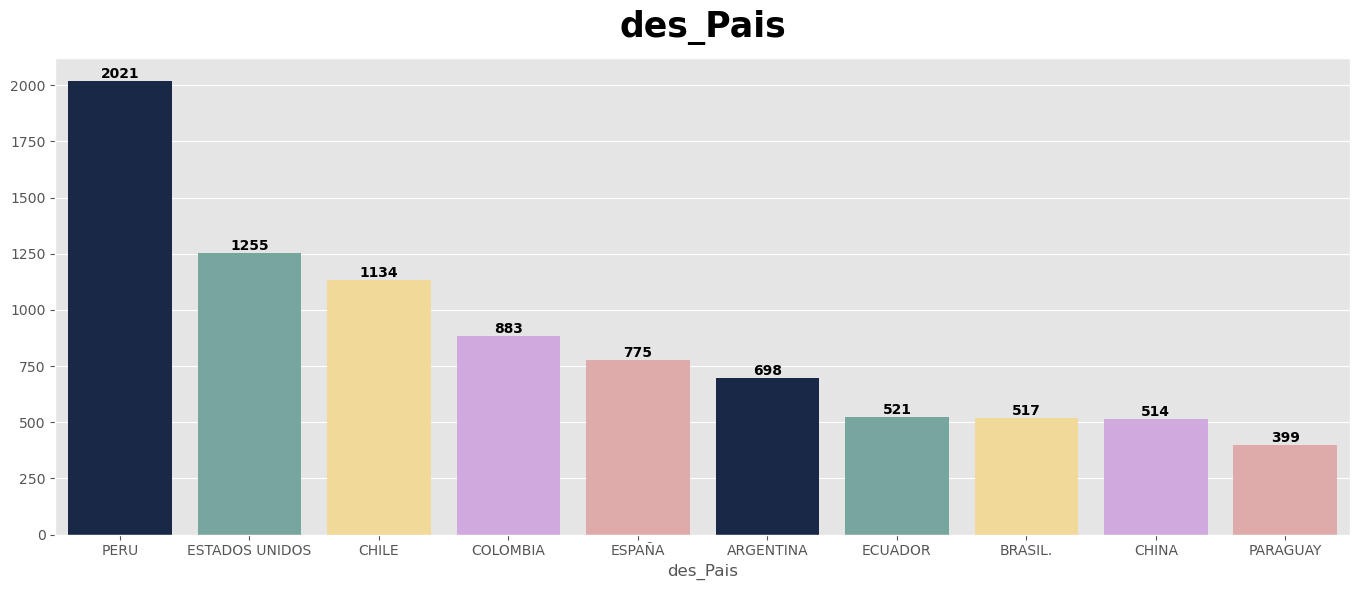

In [18]:
top_countries = Final["des_Pais"].value_counts().head(10)
filtered_final = Final[Final["des_Pais"].isin(top_countries.index)]

plt.figure(figsize=(13.7, 6))
z = filtered_final["des_Pais"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("des_Pais", fontweight="black", size=25, pad=15)
for index, value in enumerate(z.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black")

plt.tight_layout()
plt.show()

In [19]:
Final[['des_Pais']].describe()

,des_Pais
count,14018
unique,103
top,PERU
freq,2021


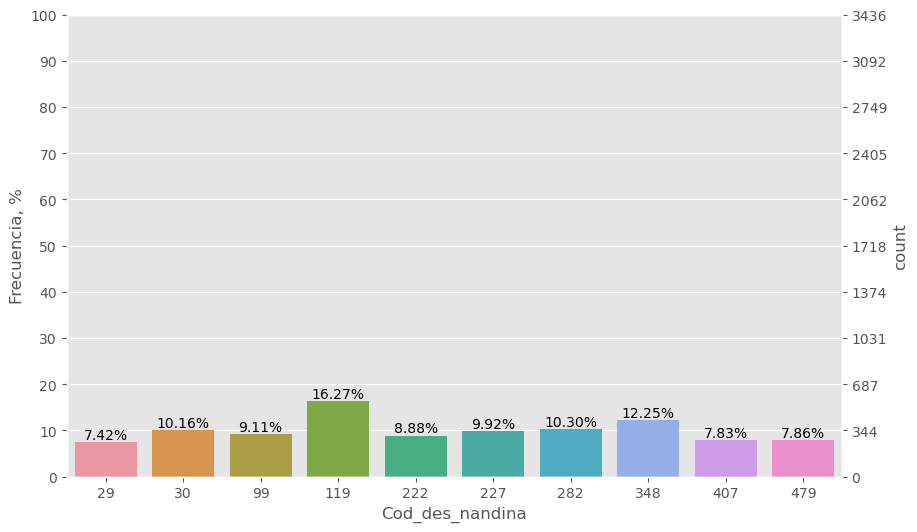

In [20]:
plt.figure(figsize=(10, 6))

sorted_countries = Final['Cod_des_nandina'].value_counts().index[:10]
filtered_final = Final[Final['Cod_des_nandina'].isin(sorted_countries)]
counter = filtered_final.shape[0]

ax1 = sns.countplot(x=filtered_final['Cod_des_nandina'])
ax2 = ax1.twinx()                      
ax2.yaxis.tick_left()                
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')  
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frecuencia, %')

for p in ax1.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax1.annotate('{:.2f}%'.format(100. * y / counter),
                (x.mean(), y),
                ha='center',
                va='bottom')

ax1.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0, 100)
ax1.set_ylim(0, counter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(None)

plt.show()

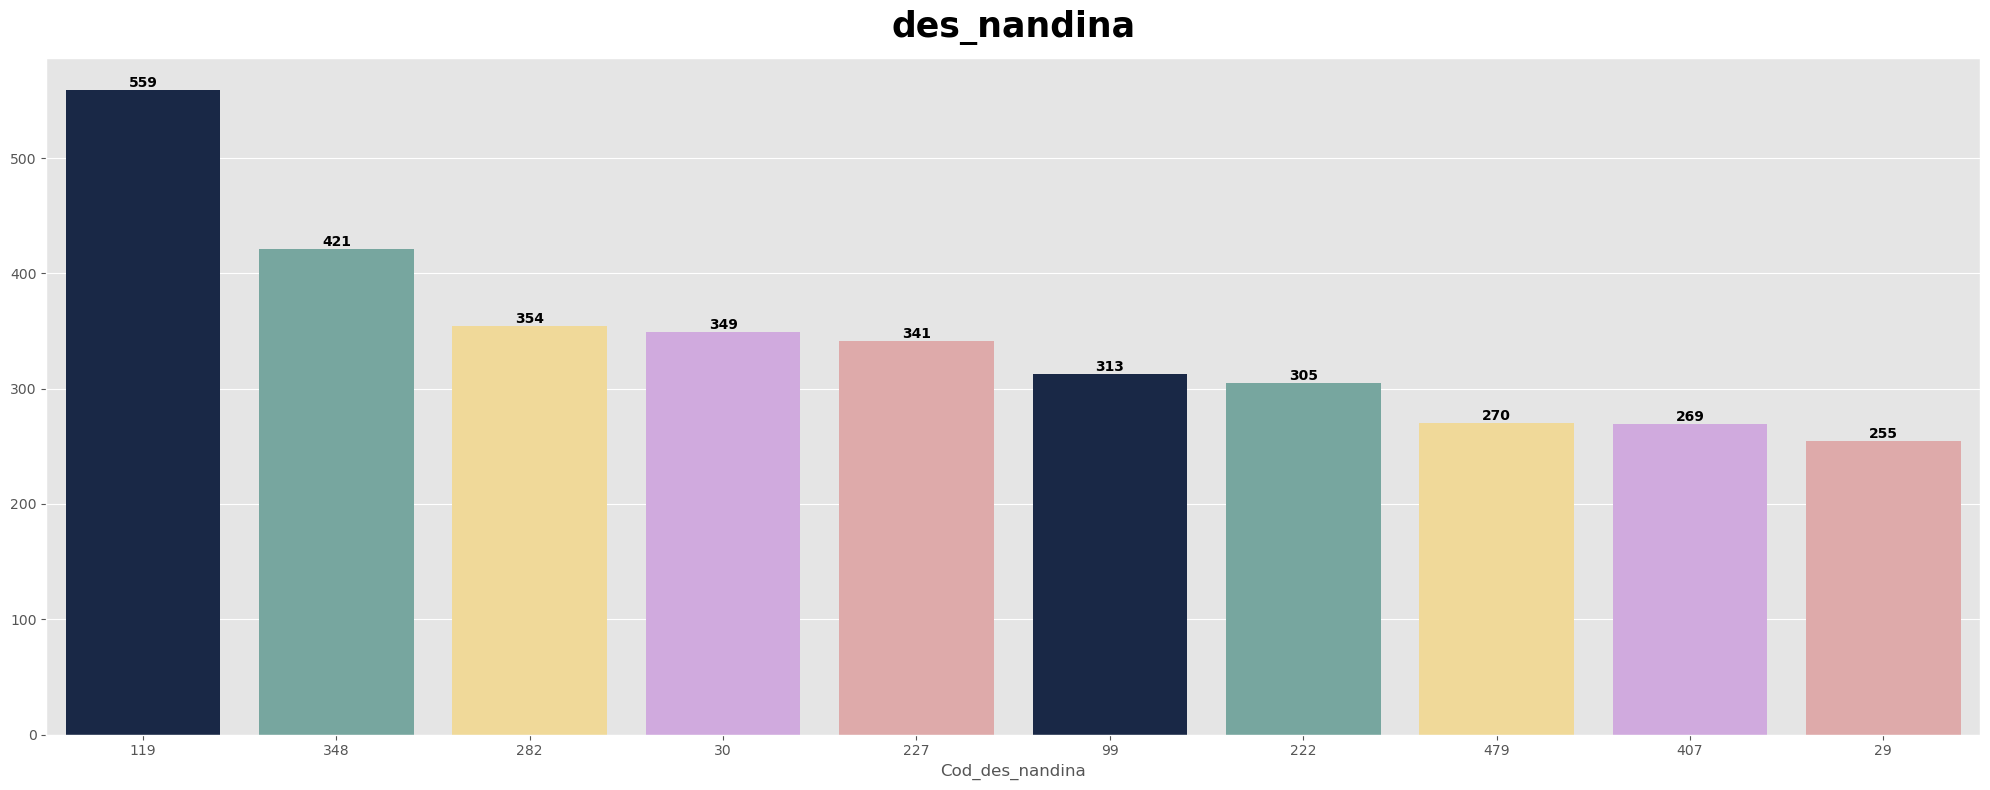

In [21]:
top_countries = Final["Cod_des_nandina"].value_counts().head(10)
filtered_final = Final[Final["Cod_des_nandina"].isin(top_countries.index)]

plt.figure(figsize=(20, 8))
z = filtered_final["Cod_des_nandina"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("des_nandina", fontweight="black", size=25, pad=15)
for index, value in enumerate(z.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black")

plt.tight_layout()
plt.show()

In [22]:
Final[['des_nandina']].describe()

,des_nandina
count,14018
unique,582
top,LAS DEMAS SEMILLAS DE CHIA ...
freq,559


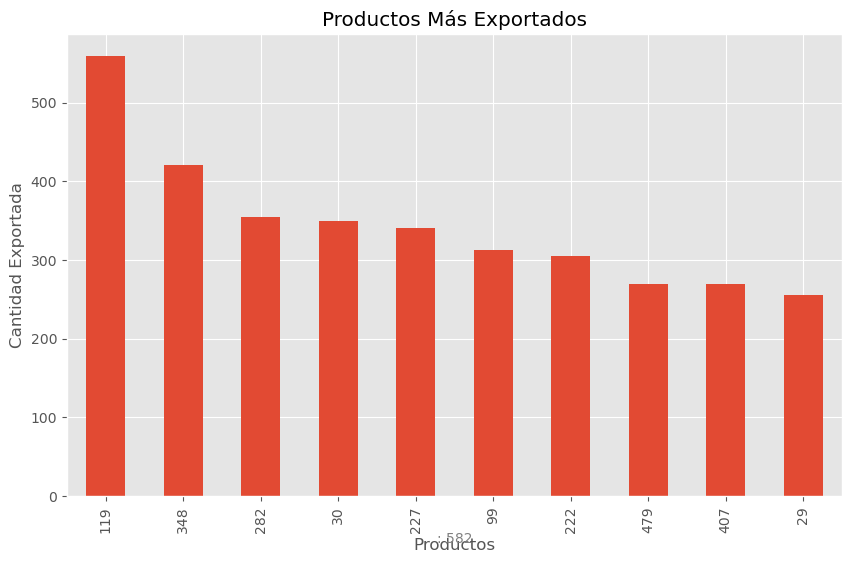

In [23]:
total_productos = len(Final['Cod_des_nandina'].unique())

sorted_products = Final.groupby('Cod_des_nandina').size().sort_values(ascending=False)
top_products = sorted_products.head(10)

plt.figure(figsize=(10, 6))
top_products.plot.bar()
plt.title('Productos Más Exportados')
plt.xlabel('Productos')
plt.ylabel('Cantidad Exportada')

plt.text(0.5, -0.1, f': {total_productos}', transform=plt.gca().transAxes, ha='center', color='gray')

plt.show()

In [24]:
def grafica_variable(variable):
    Final[variable].hist()
    plt.show()

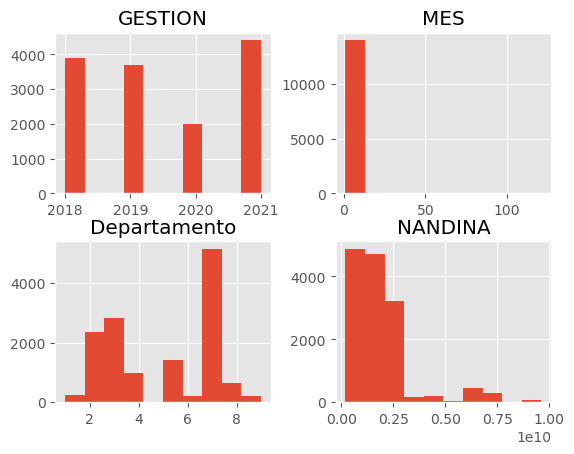

In [25]:
grafica_variable(['GESTION','MES','Departamento','NANDINA', 'des_Pais'])

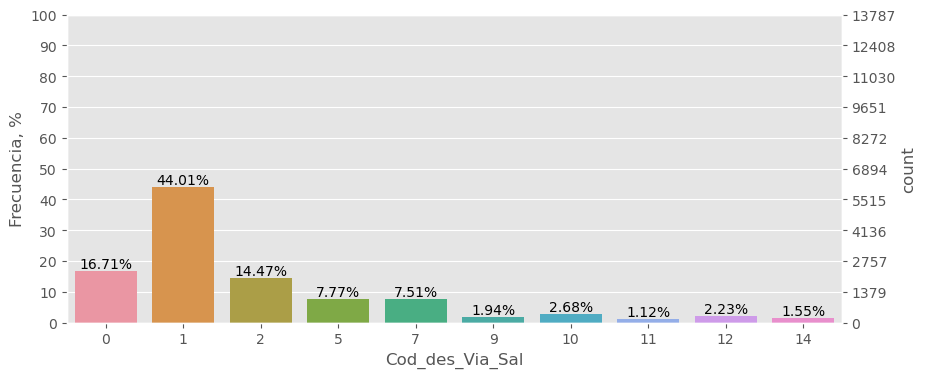

In [26]:
top_via_salida = Final['Cod_des_Via_Sal'].value_counts().head(10)

plt.figure(figsize=(10, 4))

# Crear el gráfico de barras para las 10 categorías más frecuentes
ax1 = sns.countplot(x=Final[Final['Cod_des_Via_Sal'].isin(top_via_salida.index)]['Cod_des_Via_Sal'])
ax2 = ax1.twinx()                      
ax2.yaxis.tick_left()                
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')  
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frecuencia, %')

# Añadir porcentajes en las barras
counter = Final['Cod_des_Via_Sal'].isin(top_via_salida.index).sum()
for p in ax1.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax1.annotate('{:.2f}%'.format(100. * y / counter),
                (x.mean(), y),
                ha='center',
                va='bottom')

ax1.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0, 100)
ax1.set_ylim(0, counter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(None)

plt.show()

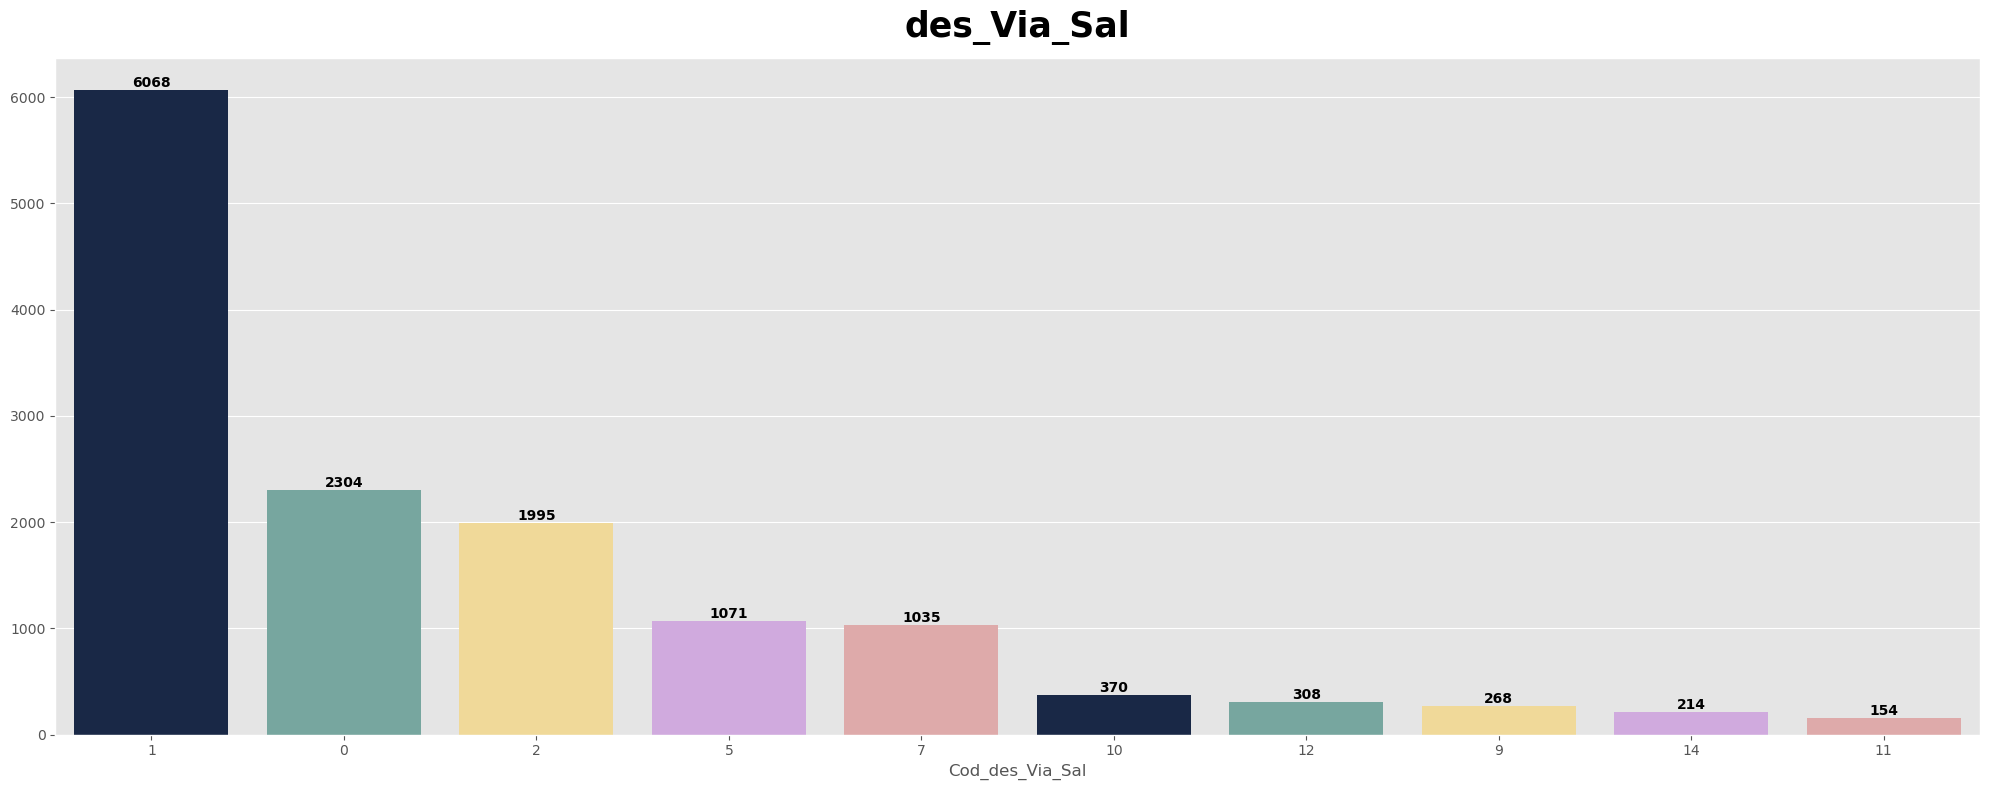

In [27]:
top_countries = Final["Cod_des_Via_Sal"].value_counts().head(10)
filtered_final = Final[Final["Cod_des_Via_Sal"].isin(top_countries.index)]

plt.figure(figsize=(20, 8))
z = filtered_final["Cod_des_Via_Sal"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("des_Via_Sal", fontweight="black", size=25, pad=15)
for index, value in enumerate(z.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black")

plt.tight_layout()
plt.show()

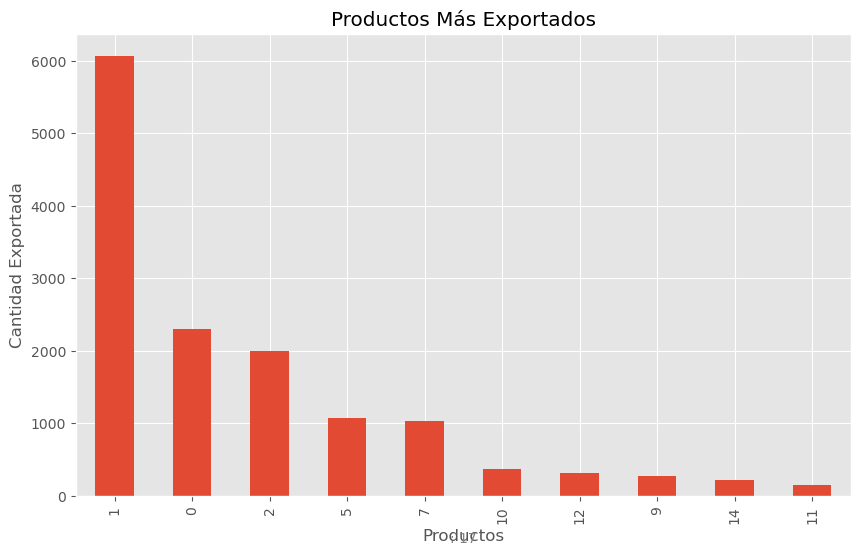

In [28]:
total_productos = len(Final['Cod_des_Via_Sal'].unique())

# Ordenar los productos por la cantidad exportada
sorted_products = Final.groupby('Cod_des_Via_Sal').size().sort_values(ascending=False)
top_products = sorted_products.head(10)

# Crear el gráfico de barras para los 10 productos más exportados
plt.figure(figsize=(10, 6))
top_products.plot.bar()
plt.title('Productos Más Exportados')
plt.xlabel('Productos')
plt.ylabel('Cantidad Exportada')

# Agregar texto con la cantidad total de productos
plt.text(0.5, -0.1, f': {total_productos}', transform=plt.gca().transAxes, ha='center', color='gray')

plt.show()

In [29]:
Final[['des_Via_Sal']].describe()

,des_Via_Sal
count,14018
unique,17
top,ARICA - CHARANA - TAMBO QUEMADO
freq,6068


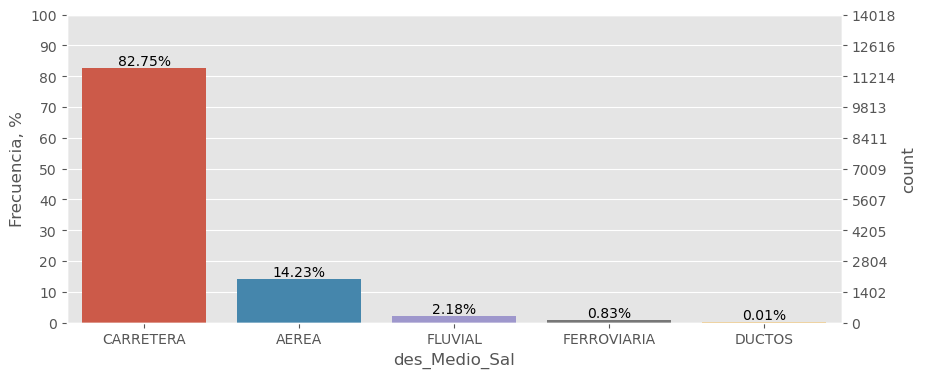

In [30]:
top_via_salida = Final['des_Medio_Sal'].value_counts().head(10)

plt.figure(figsize=(10, 4))

# Crear el gráfico de barras para las 10 categorías más frecuentes
ax1 = sns.countplot(x=Final[Final['des_Medio_Sal'].isin(top_via_salida.index)]['des_Medio_Sal'])
ax2 = ax1.twinx()                      
ax2.yaxis.tick_left()                
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')  
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frecuencia, %')

# Añadir porcentajes en las barras
counter = Final['des_Medio_Sal'].isin(top_via_salida.index).sum()
for p in ax1.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax1.annotate('{:.2f}%'.format(100. * y / counter),
                (x.mean(), y),
                ha='center',
                va='bottom')

ax1.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0, 100)
ax1.set_ylim(0, counter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(None)

plt.show()

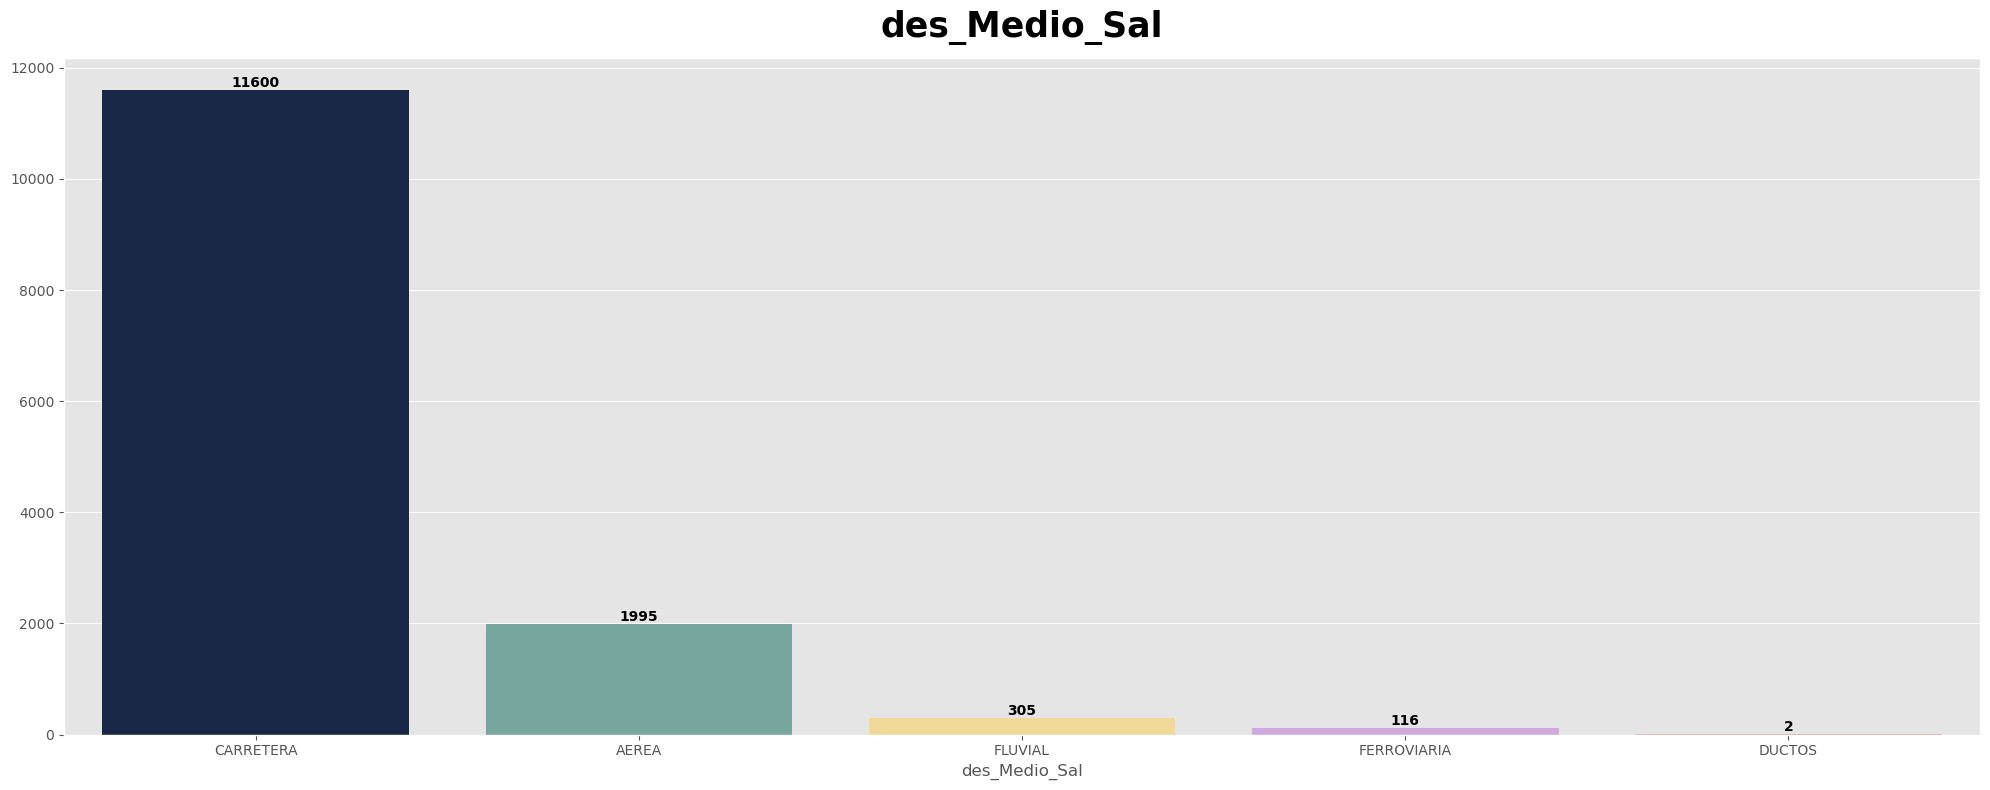

In [31]:
top_countries = Final["des_Medio_Sal"].value_counts().head(10)
filtered_final = Final[Final["des_Medio_Sal"].isin(top_countries.index)]

plt.figure(figsize=(20, 8))
z = filtered_final["des_Medio_Sal"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("des_Medio_Sal", fontweight="black", size=25, pad=15)
for index, value in enumerate(z.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black")

plt.tight_layout()
plt.show()

In [32]:
Final[['des_Medio_Sal']].describe()

,des_Medio_Sal
count,14018
unique,5
top,CARRETERA
freq,11600


In [33]:
#descripcion de datos
Final.describe()

,GESTION,MES,Departamento,NANDINA,CUCIR3,GCE,CIIU3,TNT,Peso_Bruto_Kg,Peso_Neto_Kg,Valor_FOB_Sus,Cod_des_nandina,Cod_des_Pais,Cod_des_Medio_Sal,Cod_des_Via_Sal
count,14018.000000,14018.000000,14018.000000,1.401800e+04,14018.000000,14018.000000,14018.000000,14018.000000,1.401800e+04,1.401800e+04,1.401800e+04,14018.000000,14018.000000,14018.000000,14018.000000
mean,2019.494150,6.671708,4.910472,1.893409e+09,2051.219004,177.024255,1057.876944,27.471394,8.440835e+05,8.262075e+05,5.685458e+05,250.264018,17.872236,0.211228,2.783136
std,1.198261,4.129919,2.188040,1.462776e+09,2226.165311,114.933470,793.907531,9.947859,3.973713e+06,3.941684e+06,2.703290e+06,156.810816,19.811681,0.511378,3.424027
min,2018.000000,1.000000,1.000000,2.013000e+08,111.000000,111.000000,111.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,4.000000,3.000000,1.008509e+09,542.000000,112.000000,113.000000,18.000000,2.474250e+03,2.250000e+03,7.498500e+03,119.000000,3.000000,0.000000,1.000000
50%,2019.000000,7.000000,5.000000,1.512111e+09,813.000000,122.000000,1511.000000,34.000000,2.803200e+04,2.660000e+04,5.460000e+04,222.000000,8.000000,0.000000,1.000000
75%,2021.000000,10.000000,7.000000,2.304000e+09,2831.000000,210.000000,1531.000000,34.000000,1.827575e+05,1.759250e+05,2.322338e+05,360.000000,25.000000,0.000000,5.000000
max,2021.000000,121.000000,9.000000,9.615900e+09,9710.000000,630.000000,3720.000000,34.000000,7.959631e+07,7.959631e+07,1.441899e+08,581.000000,102.000000,4.000000,16.000000


In [34]:
#descripcion de datos
Final.describe().T

,count,mean,std,min,25%,50%,75%,max
GESTION,14018.0,2.019494e+03,1.198261e+00,2018.0,2.018000e+03,2.019000e+03,2.021000e+03,2.021000e+03
MES,14018.0,6.671708e+00,4.129919e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.210000e+02
Departamento,14018.0,4.910472e+00,2.188040e+00,1.0,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00
NANDINA,14018.0,1.893409e+09,1.462776e+09,201300000.0,1.008509e+09,1.512111e+09,2.304000e+09,9.615900e+09
CUCIR3,14018.0,2.051219e+03,2.226165e+03,111.0,5.420000e+02,8.130000e+02,2.831000e+03,9.710000e+03
GCE,14018.0,1.770243e+02,1.149335e+02,111.0,1.120000e+02,1.220000e+02,2.100000e+02,6.300000e+02
CIIU3,14018.0,1.057877e+03,7.939075e+02,111.0,1.130000e+02,1.511000e+03,1.531000e+03,3.720000e+03
TNT,14018.0,2.747139e+01,9.947859e+00,2.0,1.800000e+01,3.400000e+01,3.400000e+01,3.400000e+01
Peso_Bruto_Kg,14018.0,8.440835e+05,3.973713e+06,0.0,2.474250e+03,2.803200e+04,1.827575e+05,7.959631e+07
Peso_Neto_Kg,14018.0,8.262075e+05,3.941684e+06,0.0,2.250000e+03,2.660000e+04,1.759250e+05,7.959631e+07
